# Statistics

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
def meanie(xset):
  '''returns the mean of a set of values.'''
  
  mean = sum(xset)/len(xset)
  return mean

def variance(xset,pop=True):
  '''Returns the variance of a set of values.'''
  
  diff2 = [(element - meanie(xset))**2 for element in xset]
  var = sum(diff2)/len(diff2)
  return var

def stdev(xset):
  '''Returns the standard deviation of a set of values.'''
  return (variance(xset))**0.5

In [11]:
sales =  [3505, 2400, 3027, 2798, 3700, 3250, 2689]
print(meanie(sales))
print(variance(sales))
print(stdev(sales))

3052.714285714286
183761.06122448976
428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
customers =  [127, 80, 105, 92, 120, 115, 93]
covariance = np.cov(sales, customers)

In [18]:
covariance[0][1]

7604.357142857142

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [20]:
dev_customers = stdev(customers)
dev_sales = stdev(sales)
covariance[0][1]/(dev_sales*dev_customers)

1.123306307450706

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

In [22]:
titanic.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [23]:
titanic.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

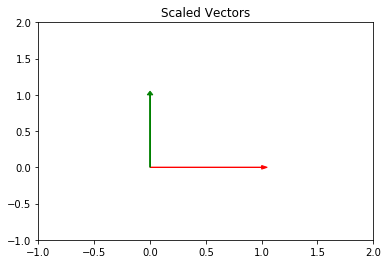

In [27]:
exvec = np.array([1,0])
whyvec = np.array([0,1])

plt.arrow(0,0, exvec[0], exvec[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, whyvec[0], whyvec[1],head_width=.05, head_length=0.05, color ='green')

plt.xlim(-1,2)          
plt.ylim(-1,2)
plt.title("Scaled Vectors")
plt.show()

# Orthogonal is perpendicular.

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [24]:
vec_a = np.array([-5,3,7])
vec_b = np.array([6,-8,2])
np.dot(vec_a,vec_b)

# They are not. If they were, their dot product would be zero.

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [53]:
vec_c = np.array([2,-15,6,20])
vec_c.shape = (1,4)
vec_c_t = vec_c.transpose()

cnorm2 = (np.linalg.norm(vec_c))**2
print(cnorm2)

cdotc = np.dot(vec_c, vec_c_t)
print(cdotc)

cTc = np.matmul(vec_c, vec_c_t)
print(cTc)

665.0
[[665]]
[[665]]


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = 7 \hat{i} + 12 \hat{j}
\end{align}

\begin{align}
e = 2 \hat{i} + 11 \hat{j} + -8 \hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [58]:
vec_f = [4, 12, 11, 9, 2]
fnorm = np.linalg.norm(vec_f)
unit_f = [element/fnorm for element in vec_f]
unit_f

[0.20908334939572668,
 0.62725004818718,
 0.5749792108382483,
 0.470437536140385,
 0.10454167469786334]

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

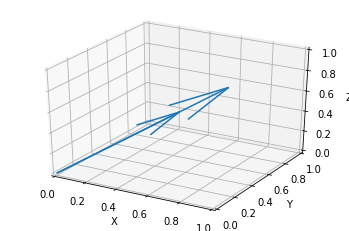

In [60]:
# Linearly dependent

vectors = np.array([[0, 0, 0, .5, .5, .5], 
                    [0, 0, 0, .7, .7, .7]])

X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

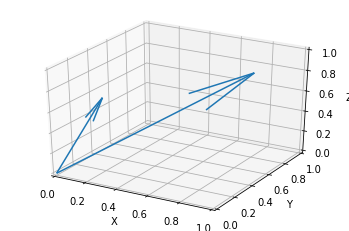

In [63]:
# Linearly inddependent

vectors = np.array([[0, 0, 0, 0, .5, .5], 
                    [0, 0, 0, .7, 1, .7]])

X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

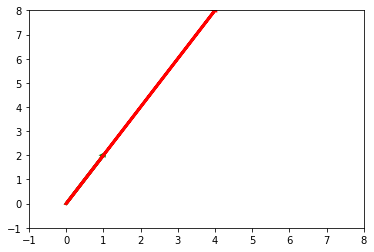

In [77]:
# The span is R, along the line Y=2x

plt.xlim(-1,8)          
plt.ylim(-1,8)


vec_g = [1,2] 

vec_h = np.multiply(4,vec_g)


plt.arrow(0,0, vec_g[0], vec_g[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0, vec_h[0], vec_h[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.show()

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [75]:
vec_l = np.array([1,2,3])
vec_m = np.array([-1,0,7])
vec_n = np.array([4,8,2])

mat_lmn = np.matrix('1 2 3; -1 0 7; 4 8 2')
eye = np.matrix('1 0 0; 0 1 0; 0 0 1')
one = np.matrix('1;1;1')

print(np.linalg.solve(mat_lmn, eye))
print(np.linalg.matrix_rank(mat_lmn))

# Span is R3

[[ 2.8 -1.  -0.7]
 [-1.5  0.5  0.5]
 [ 0.4  0.  -0.1]]
3


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



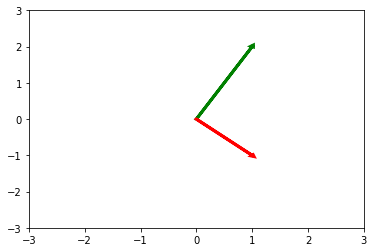

In [79]:
baseone = np.array([1,2])
basetwo = np.array([1,-1])

plt.xlim(-3,3)          
plt.ylim(-3,3)

plt.arrow(0,0, baseone[0], baseone[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0, basetwo[0], basetwo[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.show()

## 6.2 What does it mean to form a basis?

Vectors form a basis for a space if they:


*   Are linearly independent
*   Span the space
*   Other vectors in the space are written in terms of the basis vectors



# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [80]:
P = np.matrix('1 2 3; -1 0 7; 4 8 2')

np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

The rank describes how many columns of the matrix are linearly independent.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


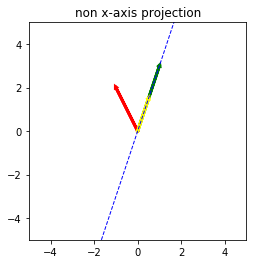

In [84]:
plt.xlim(-5,5)          
plt.ylim(-5,5)

v = [1,3] 
w = [-1,2]
proj = np.multiply((np.dot(w,v)/np.dot(v,v)),v)

axes = plt.gca()
plt.axes().set_aspect('equal')

x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals

plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='yellow')

plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

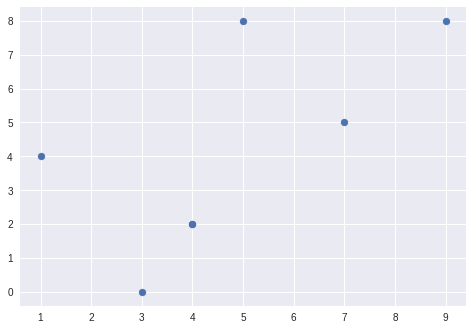

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()